In [5]:
# https://stable-baselines3.readthedocs.io/en/master/guide/rl.html
# https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#a-taxonomy-of-rl-algorithms

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Import dependencies

In [2]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv # vec multiple environments
from stable_baselines3.common.evaluation import evaluate_policy  # test how it performs

import matplotlib.pyplot as plt

### 2. Load Enviroment

In [3]:
environment_name = "CartPole-v1"

In [4]:
# Erstelle eine Environment
env = gym.make(environment_name, render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [5]:
# env.reset() setzt die Umgebung zurück und gibt ihren Anfangszustand zurück.
obs = env.reset() 
obs

(array([-0.04489554, -0.02543845, -0.0155447 , -0.0231913 ], dtype=float32),
 {})

In [6]:
# env.observation_space.sample() gibt einen zufälligen Zustand aus dem Beobachtungsraum der Umgebung zurück
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([-2.4002616e+00, -1.1087469e+38,  2.4129659e-01,  2.2514813e+38],
      dtype=float32)

In [7]:
env.observation_space.shape

(4,)

In [8]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")

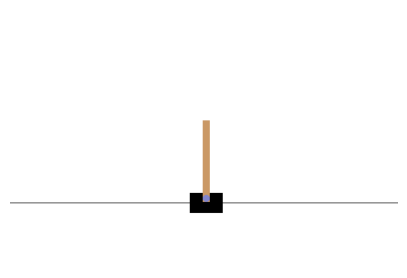

In [10]:
#plot_environment(env)
#plt.show()

In [9]:
env.action_space

Discrete(2)

In [10]:
env.action_space.sample() # 0 oder 1

1

In [11]:
"""
    Laut OpenAI:
    observation, reward, terminated, truncated, info = env.step(action)
    truncated, um anzuzeigen, ob der Schritt aufgrund einer Zeitbegrenzung abgeschnitten wurde.
"""
env.step(env.action_space.sample())

(array([ 0.04843314,  0.17580394, -0.04200684, -0.26930413], dtype=float32),
 1.0,
 False,
 False,
 {})

In [9]:
episodes = 3
for episode in range(1, episodes+1):
    obs, info = env.reset()
    terminated= False
    score = 0
    
    while not terminated:
        env.render()
        action = env.action_space.sample()
        n_obs, reward, terminated, truncated, info = env.step(action)
        score+=reward
        print('Episode:{} Score:{}'.format(episode, score))
        print('Reward:{}'.format(reward))
env.close()  

Episode:1 Score:1.0
Reward:1.0
Episode:1 Score:2.0
Reward:1.0
Episode:1 Score:3.0
Reward:1.0
Episode:1 Score:4.0
Reward:1.0
Episode:1 Score:5.0
Reward:1.0
Episode:1 Score:6.0
Reward:1.0
Episode:1 Score:7.0
Reward:1.0
Episode:1 Score:8.0
Reward:1.0
Episode:1 Score:9.0
Reward:1.0
Episode:1 Score:10.0
Reward:1.0
Episode:1 Score:11.0
Reward:1.0
Episode:1 Score:12.0
Reward:1.0
Episode:1 Score:13.0
Reward:1.0
Episode:1 Score:14.0
Reward:1.0
Episode:2 Score:1.0
Reward:1.0
Episode:2 Score:2.0
Reward:1.0
Episode:2 Score:3.0
Reward:1.0
Episode:2 Score:4.0
Reward:1.0
Episode:2 Score:5.0
Reward:1.0
Episode:2 Score:6.0
Reward:1.0
Episode:2 Score:7.0
Reward:1.0
Episode:2 Score:8.0
Reward:1.0
Episode:2 Score:9.0
Reward:1.0
Episode:2 Score:10.0
Reward:1.0
Episode:2 Score:11.0
Reward:1.0
Episode:3 Score:1.0
Reward:1.0
Episode:3 Score:2.0
Reward:1.0
Episode:3 Score:3.0
Reward:1.0
Episode:3 Score:4.0
Reward:1.0
Episode:3 Score:5.0
Reward:1.0
Episode:3 Score:6.0
Reward:1.0
Episode:3 Score:7.0
Reward:1.0
E

In [10]:
env = gym.make(environment_name, render_mode="rgb_array")
observation, info = env.reset(seed=42)
score = 0
for _ in range(10):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)
    score+=reward
    print(f"Reward: {reward}.")
    print(f"Der Score: {score}.")  

    if terminated or truncated:
        observation, info = env.reset()
        

env.close()

Reward: 1.0.
Der Score: 1.0.
Reward: 1.0.
Der Score: 2.0.
Reward: 1.0.
Der Score: 3.0.
Reward: 1.0.
Der Score: 4.0.
Reward: 1.0.
Der Score: 5.0.
Reward: 1.0.
Der Score: 6.0.
Reward: 1.0.
Der Score: 7.0.
Reward: 1.0.
Der Score: 8.0.
Reward: 1.0.
Der Score: 9.0.
Reward: 1.0.
Der Score: 10.0.


### Environment

https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [16]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

1

In [17]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample() 

array([-3.2017548e+00,  2.8516898e+38, -3.3568960e-01, -2.9268933e+38],
      dtype=float32)

In [16]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

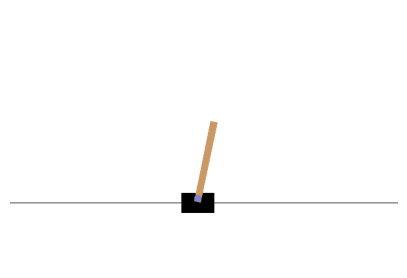

In [69]:
#plot_environment(env)
#plt.show()

### 3. Train the RL Model 

In [11]:
log_path = os.path.join('Training', 'Logs')
log_path

'Training/Logs'

In [82]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [83]:
#PPO??

In [85]:
model.learn(total_timesteps=20000)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 5944 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4217        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009269951 |
|    clip_fraction        | 0.0858      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00354     |
|    learning_rate        | 0.0003      |
|    loss                 | 8.59        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 55          |
-----------------------------------------
---

### 4. Save and reload Model

In [13]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Molde_Cartpole')

In [89]:
model.save(PPO_Path)

In [90]:
del model

In [14]:
model = PPO.load(PPO_Path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### 5. Evaluation

In [15]:
# mean_reward, std_reward 
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(500.0, 0.0)

### 6. Test Model

In [19]:
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render('human')
    if dones:
        print(f"Info: {info}")
        

Info [{'episode': {'r': 500.0, 'l': 500, 't': 408.506056}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.11621635, -0.00104511,  0.00163921, -0.0142077 ], dtype=float32)}]
Info [{'episode': {'r': 500.0, 'l': 500, 't': 416.204314}, 'TimeLimit.truncated': True, 'terminal_observation': array([-0.06530925,  0.00518817,  0.00177661, -0.01586084], dtype=float32)}]


In [17]:
env.close()

In [18]:
vec_env.close()

### 7. viewing Logs in Tensorboard

In [29]:
training_log_path = os.path.join(log_path, 'PPO_1')

In [30]:
training_log_path

'Training/Logs/PPO_1'

In [ ]:
!tensorboard --logdir={training_log_path}

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.15.2 at http://localhost:6006/ (Press CTRL+C to quit)
